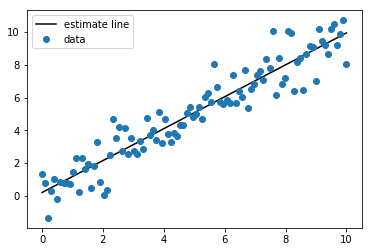

In [1]:
# 线性回归模型   
# 引入包
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
# 创建对话
sess=tf.Session()
# 构建变量
np.random.seed(10)
x_vars=np.linspace(0,10,100)
y_vars=x_vars+np.random.normal(0,1,100)
# 构建用于计算的X和Y
x_matrix=np.column_stack((np.transpose(np.matrix(np.repeat(1,100))),np.transpose(np.matrix(x_vars))))
y_matrix=np.transpose(np.matrix(y_vars))
# 构建TF量
x_tf=tf.constant(x_matrix)
y_tf=tf.constant(y_matrix)
# 构建计算式
matmul1=tf.matmul(tf.transpose(x_tf),x_tf)
matinv1=tf.matrix_inverse(matmul1)
matmul2=tf.matmul(matinv1,tf.transpose(x_tf))
solution=tf.matmul(matmul2,y_tf)
# 进行计算
solu=sess.run(solution)
# 提取参数
intercept=solu[0,0]
slope=solu[1,0]
# 作图
y_estimate=slope*x_vars+intercept
plt.plot(x_vars,y_estimate,'k-',label='estimate line')
plt.plot(x_vars,y_vars,'o',label='data')
plt.legend(loc='upper left')
plt.show()

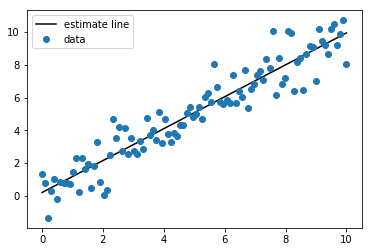

In [88]:
# 上面这种计算方式，效率实际上特别低下，特别是求解矩阵的逆时候，所以有接下来的另外一种做法
# 创建对话
sess=tf.Session()
# 构建变量
np.random.seed(10)
x_vars=np.linspace(0,10,100)
y_vars=x_vars+np.random.normal(0,1,100)
# 构建用于计算的X和Y
x_matrix=np.column_stack((np.transpose(np.matrix(np.repeat(1,100))),np.transpose(np.matrix(x_vars))))
y_matrix=np.transpose(np.matrix(y_vars))
# 构建TF量
x_tf=tf.constant(x_matrix)
y_tf=tf.constant(y_matrix)
# 构建计算式---这里开始出现不同
matmul1=tf.matmul(tf.transpose(x_tf),x_tf)
chole1=tf.cholesky(matmul1)
chole2=tf.transpose(chole1)
proce1=tf.matmul(tf.transpose(x_tf),y_tf)
y_process=tf.matrix_solve(chole1,proce1)
solution=tf.matrix_solve(chole2,y_process)
sess.run(solution)
# 提取参数
intercept=solu[0,0]
slope=solu[1,0]
# 作图
y_estimate=slope*x_vars+intercept
plt.plot(x_vars,y_estimate,'k-',label='estimate line')
plt.plot(x_vars,y_vars,'o',label='data')
plt.legend(loc='upper left')
plt.show()
plt.close()

In [178]:
# 梯度下降-线性回归模型
from sklearn import datasets
data_iris=datasets.load_iris()
iris=data_iris.data
# 提取需要的数据--本次实验仅用于观察花瓣长度与宽度之间的线性关系
iris_lr=iris[:,2:]
# 构建数据
b=np.repeat(1,iris_lr.shape[0])
data=np.column_stack((np.transpose(b),iris_lr))
# 创建对话
sess=tf.Session()
# 创建变量，占位符
beta=tf.Variable(tf.random_normal(shape=[2,1]))
xdata=tf.placeholder(shape=[None,2],dtype=tf.float32)
ydata=tf.placeholder(shape=[None,1],dtype=tf.float32)
# 创建计算公式
yestimate=tf.matmul(xdata,beta)
# 创建损失函数
loss=tf.reduce_mean(tf.square(ydata-yestimate))
# 创建迭代器
train_machine= tf.train.GradientDescentOptimizer(0.05)
train_step=train_machine.minimize(loss)
# 初始化
init=tf.global_variables_initializer()
sess.run(init)
# 设置容器
loss_container=[]
# 开始迭代
for i in range(100):
    index_rand=np.random.choice(iris_lr.shape[0],size=25)
    randx=data[index_rand,:2]
    randy=data[index_rand,2:]
    sess.run(train_step,feed_dict={xdata:randx,ydata:randy})
    loss_container.append(sess.run(loss,feed_dict={xdata:randx,ydata:randy}))
# 迭代完成提取参数
endbeta=sess.run(beta)
intercept=endbeta[0,0]
slope=endbeta[1,0]

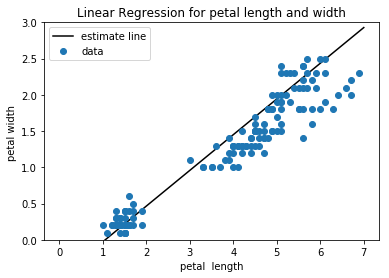

In [167]:
xspace=np.linspace(0,7,num=100)
yline=slope*xspace+intercept
plt.plot(xspace,yline,'k-',label='estimate line')
plt.plot(data[:,1],data[:,2],'o',label='data')
plt.ylim(0,3)
plt.xlabel('petal  length')
plt.ylabel('petal width ')
plt.title('Linear Regression for petal length and width')
plt.legend(loc='upper left')
plt.show()
plt.close()

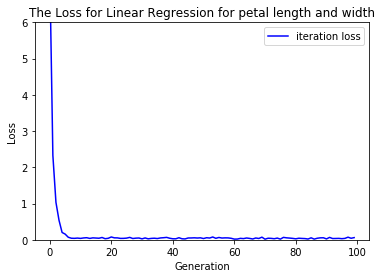

In [177]:
# 绘制损失函数图
plt.plot(np.array(loss_container),'b-',label='iteration loss')
plt.ylim(0,6)
plt.xlabel('Generation')
plt.ylabel('Loss')
plt.title('The Loss for Linear Regression for petal length and width')
plt.legend(loc='upper right')
plt.show()
plt.close()

In [181]:
# 梯度下降-线性回归模型--L1损失函数
from sklearn import datasets
data_iris=datasets.load_iris()
iris=data_iris.data
# 提取需要的数据--本次实验仅用于观察花瓣长度与宽度之间的线性关系
iris_lr=iris[:,2:]
# 构建数据
b=np.repeat(1,iris_lr.shape[0])
data=np.column_stack((np.transpose(b),iris_lr))
# 创建对话
sess=tf.Session()
# 创建变量，占位符
beta=tf.Variable(tf.random_normal(shape=[2,1]))
xdata=tf.placeholder(shape=[None,2],dtype=tf.float32)
ydata=tf.placeholder(shape=[None,1],dtype=tf.float32)
# 创建计算公式
yestimate=tf.matmul(xdata,beta)
# 创建损失函数
loss=tf.reduce_mean(tf.abs(ydata-yestimate))
# 创建迭代器
train_machine= tf.train.GradientDescentOptimizer(0.05)
train_step=train_machine.minimize(loss)
# 初始化
init=tf.global_variables_initializer()
sess.run(init)
# 设置容器
loss_container_l1=[]
# 开始迭代
for i in range(100):
    index_rand=np.random.choice(iris_lr.shape[0],size=25)
    randx=data[index_rand,:2]
    randy=data[index_rand,2:]
    sess.run(train_step,feed_dict={xdata:randx,ydata:randy})
    loss_container_l1.append(sess.run(loss,feed_dict={xdata:randx,ydata:randy}))

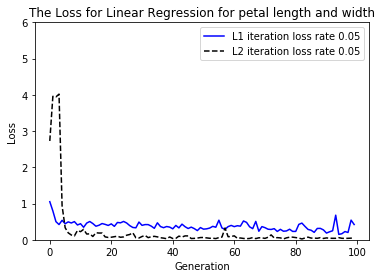

In [185]:
# 绘制损失函数图
plt.plot(loss_container_l1,'b-',label='L1 iteration loss rate 0.05')
plt.plot(loss_container,'k--',label='L2 iteration loss rate 0.05')
plt.ylim(0,6)
plt.xlabel('Generation')
plt.ylabel('Loss')
plt.title('The Loss for Linear Regression for petal length and width')
plt.legend(loc='upper right')
plt.show()
plt.close()

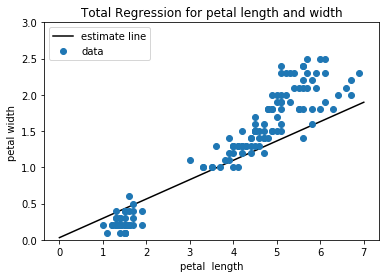

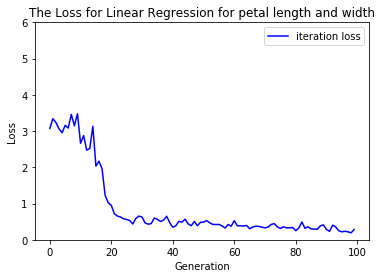

In [15]:
# Tensorflow 实现戴明回归--total regression
# 梯度下降-线性回归模型
from sklearn import datasets
data_iris=datasets.load_iris()
iris=data_iris.data
# 提取需要的数据--本次实验仅用于观察花瓣长度与宽度之间的线性关系
iris_lr=iris[:,2:]
# 构建数据
b=np.repeat(1,iris_lr.shape[0])
data=np.column_stack((np.transpose(b),iris_lr))
# 创建对话
sess=tf.Session()
# 创建变量，占位符
beta=tf.Variable(tf.random_normal(shape=[2,1]))
xdata=tf.placeholder(shape=[None,2],dtype=tf.float32)
ydata=tf.placeholder(shape=[None,1],dtype=tf.float32)
# 创建计算公式---损失函数发生变化
abs1=tf.abs(ydata-tf.matmul(xdata,beta))
loss=tf.reduce_mean(tf.truediv(abs1,tf.sqrt(tf.square(beta[1,0])+1)))
# 创建迭代器
train_machine= tf.train.GradientDescentOptimizer(0.05)
train_step=train_machine.minimize(loss)
# 初始化
init=tf.global_variables_initializer()
sess.run(init)
# 设置容器
loss_container=[]
# 开始迭代
for i in range(100):
    index_rand=np.random.choice(iris_lr.shape[0],size=25)
    randx=data[index_rand,:2]
    randy=data[index_rand,2:]
    sess.run(train_step,feed_dict={xdata:randx,ydata:randy})
    loss_container.append(sess.run(loss,feed_dict={xdata:randx,ydata:randy}))
# 迭代完成提取参数
endbeta=sess.run(beta)
intercept=endbeta[0,0]
slope=endbeta[1,0]
xspace=np.linspace(0,7,num=100)
yline=slope*xspace+intercept
plt.plot(xspace,yline,'k-',label='estimate line')
plt.plot(data[:,1],data[:,2],'o',label='data')
plt.ylim(0,3)
plt.xlabel('petal  length')
plt.ylabel('petal width ')
plt.title('Total Regression for petal length and width')
plt.legend(loc='upper left')
plt.show()
plt.close()
# 绘制损失函数图
plt.plot(np.array(loss_container),'b-',label='iteration loss')
plt.ylim(0,6)
plt.xlabel('Generation')
plt.ylabel('Loss')
plt.title('The Loss for Linear Regression for petal length and width')
plt.legend(loc='upper right')
plt.show()
plt.close()

In [ ]:
# 实现lasso回归
